In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
raca_0_ate_5_anos = pd.read_csv("../0_ate_5/analise_geral/analise_geral.csv")
raca_0_ate_5_anos['faixa_etaria'] = '0 a 5 anos'

raca_5_ate_10_anos = pd.read_csv("../5_ate_10/analise_geral/analise_geral.csv")
raca_5_ate_10_anos['faixa_etaria'] = '5 a 10 anos'

raca_adolescente = pd.read_csv("../adolescente/analise_geral/analise_geral.csv")
raca_adolescente['faixa_etaria'] = 'Adolescentes (10 a 18 anos)'

df_completo = pd.concat([raca_0_ate_5_anos, raca_5_ate_10_anos, raca_adolescente])


/var/folders/gy/cxx2_pv95ys52g0qvnjgcsqm0000gn/T/ipykernel_45954/1435734046.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  raca_0_ate_5_anos = pd.read_csv("../0_ate_5/analise_geral/analise_geral.csv")
/var/folders/gy/cxx2_pv95ys52g0qvnjgcsqm0000gn/T/ipykernel_45954/1435734046.py:7: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  raca_adolescente = pd.read_csv("../adolescente/analise_geral/analise_geral.csv")


In [33]:
df_completo['total'] = df_completo['total'].astype(str).str.replace('.', '', regex=True)
df_completo['total'] = pd.to_numeric(df_completo['total'], errors='coerce')

In [34]:
df_completo.columns

Index(['Unnamed: 0', 'regiao', 'codigo_uf', 'uf', 'codigo_ibge', 'municipio',
       'qtd_magreza_acentuada', 'perc_magreza_acentuada', 'qtd_magreza',
       'perc_magreza', 'qtd_eutrofia', 'perc_eutrofia', 'qtd_risco_sobrepeso',
       'perc_risco_sobrepeso', 'qtd_sobrepeso', 'perc_sobrepeso',
       'qtd_obesidade', 'perc_obesidade', 'total', 'ano', 'faixa_etaria'],
      dtype='object')

In [38]:
colunas_para_converter = ['qtd_magreza_acentuada', 'qtd_magreza', 'qtd_eutrofia', 'qtd_risco_sobrepeso', 'qtd_sobrepeso', 'qtd_obesidade'] 

for coluna in colunas_para_converter:
    df_completo[coluna] = df_completo[coluna].astype(str).str.strip()  
    df_completo[coluna] = df_completo[coluna].str.replace(r'\.', '', regex=True)  
    df_completo[coluna] = pd.to_numeric(df_completo[coluna], errors='coerce') 

In [39]:
colunas_para_somar = ['qtd_magreza_acentuada', 'qtd_magreza', 'qtd_eutrofia', 'qtd_risco_sobrepeso', 'qtd_sobrepeso', 'qtd_obesidade'] 
df_completo = df_completo[df_completo['regiao'].str.startswith(('TOTAL REGIÃO', 'TOTAL BRASIL'), na=False)]
df_grouped = df_completo.groupby(['regiao', 'ano'])[colunas_para_somar].sum().reset_index()
df_grouped['regiao'].unique()

array(['TOTAL BRASIL', 'TOTAL REGIÃO CENTRO-OESTE',
       'TOTAL REGIÃO NORDESTE', 'TOTAL REGIÃO NORTE',
       'TOTAL REGIÃO SUDESTE', 'TOTAL REGIÃO SUL'], dtype=object)

In [40]:

df_grouped['total'] = df_grouped[colunas_para_somar].sum(axis=1)
for coluna in colunas_para_somar:
    df_grouped[f'{coluna}_perc'] = (df_grouped[coluna] / df_grouped['total']) 


In [42]:
df_grouped['perc_total_obesidade'] = df_grouped['qtd_sobrepeso_perc'] + df_grouped['qtd_obesidade_perc']

In [43]:
df_grouped = df_grouped[['regiao', 'perc_total_obesidade', 'ano']]

mapeamento = {
    'TOTAL REGIÃO CENTRO-OESTE': 'Centro-oeste',
    'TOTAL REGIÃO NORDESTE': 'Nordeste',
    'TOTAL REGIÃO NORTE': 'Norte',
    'TOTAL REGIÃO SUDESTE': 'Sudeste',
    'TOTAL REGIÃO SUL': 'Sul',
    'TOTAL BRASIL': 'Total Brasil'
}

df_grouped['regiao'] = df_grouped['regiao'].replace(mapeamento)

In [44]:
df_grouped['perc_total_obesidade'] = df_grouped['perc_total_obesidade']*100

/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

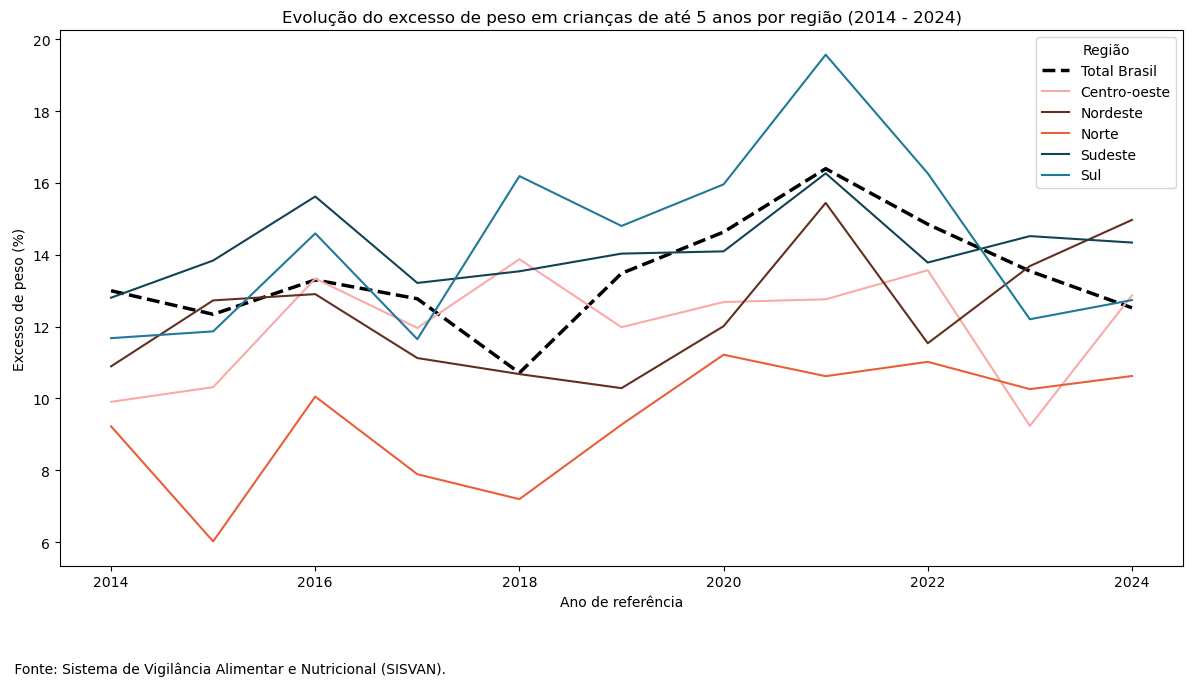

In [45]:
plt.figure(figsize=(12, 7))  
cat_colors = ["#F9AAA9", "#632F21", "#E95F3A", "#114354", "#1F7A99"]
sns.set_palette(cat_colors)

regioes = df_grouped['regiao'].unique()

for regiao in regioes:
    data = df_grouped[df_grouped['regiao'] == regiao]
    if regiao == "Total Brasil":
        sns.lineplot(data=data, x='ano', y='perc_total_obesidade', label=regiao,linewidth=2.5, linestyle='--', color='black')  
    else:
        sns.lineplot(data=data, x='ano', y='perc_total_obesidade', label=regiao,linewidth=1.5)

plt.title('Evolução do excesso de peso em crianças de até 5 anos por região (2014 - 2024)')
plt.xlabel('Ano de referência')
plt.ylabel('Excesso de peso (%)')
plt.legend(title='Região')
plt.figtext(0.01, -0.02, " Fonte: Sistema de Vigilância Alimentar e Nutricional (SISVAN).", ha="left", fontsize=10)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  
plt.show()
